# here my data is compared to Gunters publiction

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import geopandas as gpd


In [2]:
control=pd.read_excel('DATA/control_gunter.xlsx')
data=gpd.read_file('final/complete_KKA.geojson')
data_all=gpd.read_file('final/complete.geojson')
database=pd.read_excel('final/database.xlsx')
database.PE=database.PE.astype(np.int64).round()



# check data with spat ref

# compare spatial all with control Gunter
    > no PE control available

In [3]:
control=pd.read_excel('DATA/control_gunter.xlsx')
data_BL_all=data_all.groupby('BL').sum().reset_index()[['BL','PE_nonitri','sum_PE','freq']]
data_BL_all=data_BL_all[['BL','freq','sum_PE']]
data_BL_all.rename(columns={'freq':'freq_all','sum_PE':'sum_PE_all', 'BL':'Bundesland'}, inplace=True)
data_BL_all=data_BL_all.set_index('Bundesland')

control.set_index('Bundesland',inplace=True)
control_df=control.join(data_BL_all, how='left')

control_df.rename(columns={'<=500PE':'control_freq_all'},inplace=True)
control_df['diff_freq']=control_df.control_freq_all-control_df.freq_all
control_df=control_df[['control_freq_all','freq_all']]
control_df['diff_freq_all']=control_df.control_freq_all-control_df.freq_all
control_df=control_df.fillna(0)
control_df.freq_all=control_df.freq_all.astype(int)
control_df.diff_freq_all=control_df.diff_freq_all.astype(int)

control_df['div']=(control_df.control_freq_all-control_df.freq_all)/control_df.control_freq_all*100
control_df['div']=control_df['div'].round(2)
control_df.sort_values('div')

,control_freq_all,freq_all,diff_freq_all,div
Bundesland,,,,
Upper-Austria,2524,2633,-109,-4.32
Tirol,1294,1294,0,0.00
Salzburg,1732,1708,24,1.39
Carintia,7279,7052,227,3.12
Stirya,10718,10173,545,5.08
Lower-Austria,4982,4313,669,13.43
Burgenland,23,0,0,100.00
Vorarlberg,156,0,0,100.00
Vienna,25,0,0,100.00


In [4]:
#5.5 % lost with spat ref
overall_freq=(control_df.control_freq_all.sum()-control_df.freq_all.sum())/control_df.control_freq_all.sum()*100
overall_freq

5.429297323634845

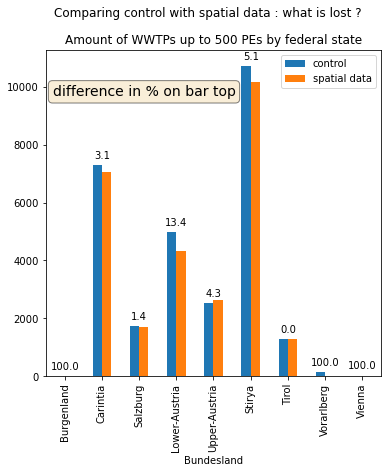

In [5]:
fig,ax=plt.subplots(figsize=(6,6))
control_df.plot.bar(y=['control_freq_all','freq_all'],ax=ax)
which=[9,10,11,12,13,14,15,16,17]
values=[x for x in control_df['div'].round(1)]
values[4]=4.3

ax.legend(['control','spatial data'])
plt.suptitle('Comparing control with spatial data : what is lost ?')
ax.set_title('Amount of WWTPs up to 500 PEs by federal state')


#which=range(len(ax.patches))
#which=[6,7,8,9,10,11]
which=[0,1,2,3,4,5,6,7,8]
n=0
for index, rect in enumerate(ax.patches):
    if index in which:
        
        height = rect.get_height()
        ax.text(rect.get_x()+0.13 + rect.get_width() / 2, height+150 , values[n],
                ha='center', va='bottom', fontsize='medium', fontstretch='condensed')
        n=n+1
#add text
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig.text(0.14, 0.8, 'difference in % on bar top', fontsize=14,
        verticalalignment='top',bbox=props)
plt.savefig('graphs/all_precision.png', bbox_inches='tight')

# comparing KKA with KKA Gunter
    >looks good 
    > difference is due to missing spat ref

In [6]:
data_BL=data.groupby('BL').sum().reset_index()[['BL','PE_nonitri','sum_PE','freq']]
data_BL=data_BL[['BL','freq','sum_PE']]
data_BL=data_BL.set_index('BL')

control_KKA=control.join(data_BL, how='left')
control_KKA.rename(columns={'<=50PE':'control_freq', 'PE_sum':'control_sum_PE'}, inplace=True)
control_KKA=control_KKA[['control_freq','freq','control_sum_PE','sum_PE']]

control_KKA=control_KKA.fillna(0).astype(int)


control_KKA['div']=(control_KKA.control_freq-control_KKA.freq)/control_KKA.control_freq*100
control_KKA['div']=control_KKA['div'].round(2)
control_KKA.sort_values('div')
control_KKA

,control_freq,freq,control_sum_PE,sum_PE,div
Bundesland,,,,,
Burgenland,20,0,198,0,100.00
Carintia,6961,6747,62459,60573,3.07
Salzburg,1655,1631,20924,20660,1.45
Lower-Austria,4515,3835,50655,43501,15.06
Upper-Austria,2398,2522,29412,30880,-5.17
Stirya,10665,10123,85726,80535,5.08
Tirol,1096,1097,9508,9457,-0.09
Vorarlberg,129,0,1331,0,100.00
Vienna,13,0,280,0,100.00


In [7]:
#5.4 % lost with spat ref
overall_freq=(control_KKA.control_freq.sum()-control_KKA.freq.sum())/control_KKA.control_freq.sum()*100
overall_freq

5.453154597114964

<AxesSubplot:xlabel='Bundesland'>

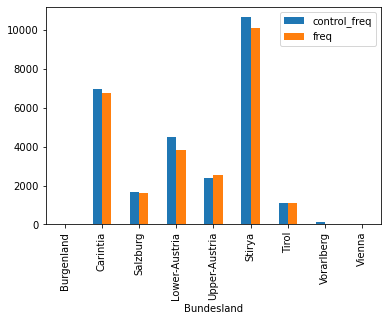

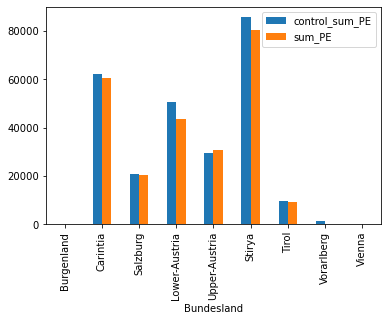

In [8]:
control_KKA.plot.bar(y=['control_freq','freq'])
control_KKA.plot.bar(y=['control_sum_PE','sum_PE'])

# result
    > relative small differences all in all
    > PE difference up to 16% for NOE
    > difference seems to stay similar when comparing <500 and <50. reason is probably some mask in code
    >5% lost with geo ref 

# check database VS Gunter : no spatial reduction

# check database of KKA
    > here no spat ref reduction

In [9]:
control=pd.read_excel('DATA/control_gunter.xlsx')
database_KKA=database[database.PE<=50]
database_KKA.PE=database.PE.astype(np.int64).round()
data_BL=database_KKA.groupby('BL').sum().reset_index()[['BL','PE']]
data_BL=data_BL[['BL','PE']]

x=database_KKA.groupby('BL').count().reset_index()[['BL','PE']]
x.rename(columns={'PE':'freq'},inplace=True)
data_BL=pd.merge(data_BL, x, on='BL')

control_db=control[['Bundesland','<=50PE','PE_sum']]
control_db.rename(columns={'Bundesland':'BL'},inplace=True)
control_db=pd.merge(control_db, data_BL, on='BL')
control_db=control_db[['BL','<=50PE','freq','PE_sum','PE']]

control_db
control_db['accuracy']=control_db['<=50PE']/control_db.freq*100
control_db['accuracy']=control_db['accuracy'].round(2)
control_db.sort_values('accuracy')

C:\Users\fabrizio\anaconda3\envs\geo\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\fabrizio\anaconda3\envs\geo\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,BL,<=50PE,freq,PE_sum,PE,accuracy
4,Upper-Austria,2398,2522,29412,30880,95.08
3,Lower-Austria,4515,4544,50655,50657,99.36
1,Carintia,6961,6978,62459,61470,99.76
6,Tirol,1096,1097,9508,9436,99.91
2,Salzburg,1655,1656,20924,20613,99.94
0,Burgenland,20,20,198,198,100.00
5,Stirya,10665,10665,85726,85726,100.00
7,Vorarlberg,129,129,1331,1331,100.00
8,Vienna,13,13,280,280,100.00


In [10]:
#0.6 considering aslo Upper-Austria
overall_freq=(control_db['<=50PE'].sum()-control_db.freq.sum())/control_db['<=50PE'].sum()*100
overall_freq

-0.6265481567827481

In [11]:
#0.03 lost in PE
overall_PE=(control_db.PE.sum()-control_db.PE_sum.sum())/control_db.PE.sum()*100
overall_PE

0.03760682448741515

# result
    > great! nearly perfect

# check database 500PE

In [12]:
control=pd.read_excel('DATA/control_gunter.xlsx')

database_all=database[database.PE<=500]
data_BL=database_all.groupby('BL').count().reset_index()[['BL','PE']]
data_BL.rename(columns={'PE':'freq'},inplace=True)
data_BL.set_index('BL',inplace=True)

control.set_index('Bundesland',inplace=True)
control_db=control.loc[:,'<=500PE']
control_db=pd.merge(control_db, data_BL, left_index=True, right_index=True)
control_db=control_db[['<=500PE','freq']]

control_db['diff']=(control_db['<=500PE']-control_db.freq)/control_db['<=500PE']*100
control_db['diff']=control_db['diff'].round(2)
control_db.sort_values('diff')


,<=500PE,freq,diff
Upper-Austria,2524,2633,-4.32
Lower-Austria,4982,5025,-0.86
Carintia,7279,7293,-0.19
Burgenland,23,23,0.00
Stirya,10718,10718,0.00
Tirol,1294,1294,0.00
Vorarlberg,156,156,0.00
Vienna,25,25,0.00
Salzburg,1732,1730,0.12


In [13]:
#0.6 considering aslo Upper-Austria
overall_freq=(control_db['<=500PE'].sum()-control_db.freq.sum())/control_db['<=500PE'].sum()*100
overall_freq

-0.570772282741099

# result : great


    > maybe add definitoon of text as pathc below legend

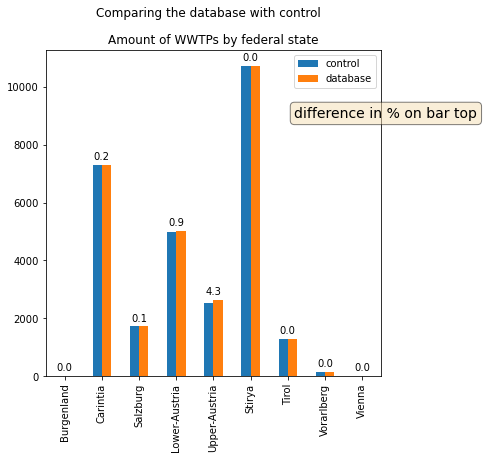

In [14]:
fig,ax=plt.subplots(figsize=(6,6))
control_db.plot.bar(y=['<=500PE','freq'],ax=ax)
which=[9,10,11,12,13,14,15,16,17]
values=[x for x in control_db['diff'].round(1).abs()]
#values[2]=0.0
#values[6]=5.0
ax.legend(['control','database'])
plt.suptitle('Comparing the database with control')
#which=range(len(ax.patches))
ax.set_title('Amount of WWTPs by federal state')

n=0
for index, rect in enumerate(ax.patches):
    if index in which:
        
        height = rect.get_height()
        ax.text(rect.get_x()-0.13 + rect.get_width() / 2, height+100 , values[n],
                ha='center', va='bottom', fontsize='medium', fontstretch='ultra-condensed')
        n=n+1

#add text
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig.text(0.7, 0.75, 'difference in % on bar top', fontsize=14,
        verticalalignment='top',bbox=props)
        
plt.savefig('graphs/database_precision.png', bbox_inches='tight')

# control tech_type of KKA


### by PE

In [15]:
control=pd.read_excel('DATA/control_gunter.xlsx', sheet_name=1)
database_KKA=database[database.PE<=50]
KKA=database_KKA.groupby(['BL','tech_type']).PE.sum().reset_index().pivot('BL','tech_type','PE')
test=pd.merge(KKA,control, on="BL")
test=test.fillna(0)
test['unbek+andere']=test.Andere+test.Unbekannt
x=test[['BL','3-k','mechan','Bel.','Belebung','PKA','PKA_','SBR','SBR_','unbek+andere','Unbek+andere']]
x=x.set_index('BL').astype(int)
#x.T

### second column is always control

In [16]:
x['mechanich']=(x.mechan-x['3-k'])/x.mechan*100
x['belebung']=(x.Belebung-x['Bel.'])/x.Belebung*100
x['pka']=(x.PKA_-x.PKA)/x.PKA_*100
x['sbr']=(x.SBR_-x.SBR)/x.SBR_*100
x['andere']=(x['Unbek+andere']-x['unbek+andere'])/x['Unbek+andere']*100
extract=x.iloc[:,-5:]
extract=extract.fillna(0).abs().round(1)




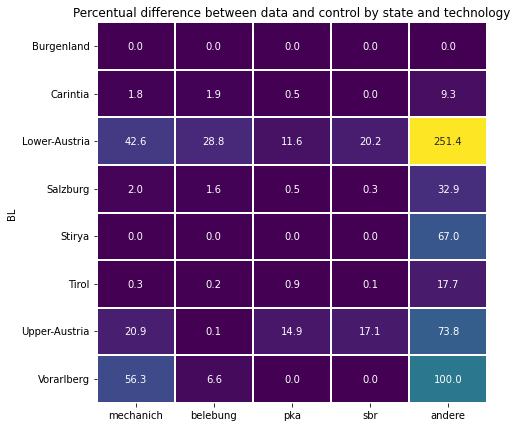

In [17]:
fi,ax=plt.subplots(figsize=(7,7))
sbn.heatmap(extract, cmap='viridis', annot=True, fmt='.1f', linewidths=0.01, ax=ax, cbar=False)

ax.set_title('percentual difference between data and control by state and technology'.capitalize())
plt.savefig('graphs/heatmap_control.png', bbox_inches='tight')

In [18]:
test[['BL','Andere','Unbekannt']]

,BL,Andere,Unbekannt
0,Burgenland,0.0,0.0
1,Carintia,0.0,1188.0
2,Lower-Austria,521.0,12763.0
3,Salzburg,37.0,484.0
4,Stirya,65.0,121.0
5,Tirol,160.0,585.0
6,Upper-Austria,1549.0,0.0
7,Vorarlberg,0.0,0.0


In [19]:
y=x.loc['Carintia':'Upper-Austria',:]

<AxesSubplot:xlabel='BL'>

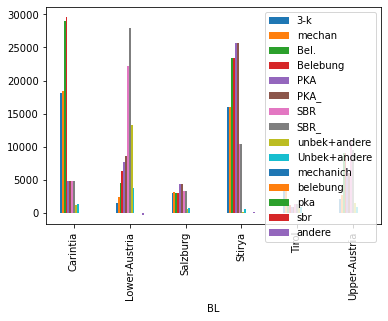

In [20]:
y.plot.bar()

## by freq

In [21]:
control=pd.read_excel('DATA/control_gunter.xlsx', sheet_name=2)
database_KKA=database[database.PE<=50]
KKA=database_KKA.groupby(['BL','tech_type']).PE.count().reset_index().pivot('BL','tech_type','PE')
test=pd.merge(KKA,control, on="BL")
test=test.fillna(0)
test['unbek+andere']=test.Andere+test.Unbekannt
x=test[['BL','3-k','mechan','Bel.','Belebung','PKA','PKA_','SBR','SBR_','unbek+andere','Unbek+andere']]
x=x.set_index('BL').astype(int)

In [22]:
x

,3-k,mechan,Bel.,Belebung,PKA,PKA_,SBR,SBR_,unbek+andere,Unbek+andere
BL,,,,,,,,,,
Burgenland,0,0,4,4,14,14,1,1,0,0
Carintia,2246,2248,3053,3051,556,556,567,566,176,160
Lower-Austria,156,256,311,452,792,893,1956,2513,1199,255
Salzburg,306,304,233,234,279,279,274,274,55,12
Stirya,2386,2385,2532,2532,3276,3276,1044,1044,295,296
Tirol,660,660,92,92,60,61,108,107,50,49
Upper-Austria,310,381,658,646,540,475,862,702,128,4
Vorarlberg,4,14,8,7,4,4,28,28,0,1


In [23]:
x['mechanich']=(x.mechan-x['3-k'])/x.mechan*100
x['belebung']=(x.Belebung-x['Bel.'])/x.Belebung*100
x['pka']=(x.PKA_-x.PKA)/x.PKA_*100
x['sbr']=(x.SBR_-x.SBR)/x.SBR_*100
x['andere']=(x['Unbek+andere']-x['unbek+andere'])/x['Unbek+andere']*100
extract=x.iloc[:,-5:]
extract=extract.fillna(0).abs().round(1)


In [24]:
x

,3-k,mechan,Bel.,Belebung,PKA,PKA_,SBR,SBR_,unbek+andere,Unbek+andere,mechanich,belebung,pka,sbr,andere
BL,,,,,,,,,,,,,,,
Burgenland,0,0,4,4,14,14,1,1,0,0,NaN,0.000000,0.000000,0.000000,NaN
Carintia,2246,2248,3053,3051,556,556,567,566,176,160,0.088968,-0.065552,0.000000,-0.176678,-10.000000
Lower-Austria,156,256,311,452,792,893,1956,2513,1199,255,39.062500,31.194690,11.310190,22.164743,-370.196078
Salzburg,306,304,233,234,279,279,274,274,55,12,-0.657895,0.427350,0.000000,0.000000,-358.333333
Stirya,2386,2385,2532,2532,3276,3276,1044,1044,295,296,-0.041929,0.000000,0.000000,0.000000,0.337838
Tirol,660,660,92,92,60,61,108,107,50,49,0.000000,0.000000,1.639344,-0.934579,-2.040816
Upper-Austria,310,381,658,646,540,475,862,702,128,4,18.635171,-1.857585,-13.684211,-22.792023,-3100.000000
Vorarlberg,4,14,8,7,4,4,28,28,0,1,71.428571,-14.285714,0.000000,0.000000,100.000000


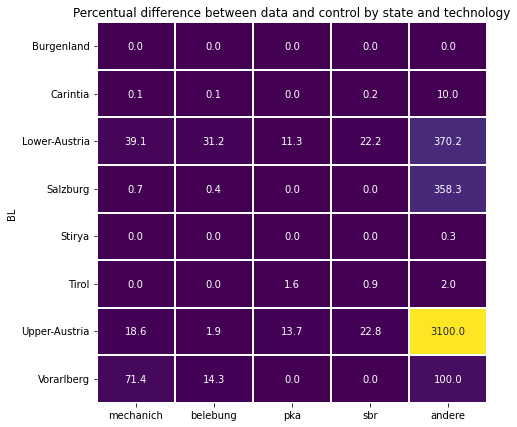

In [25]:
fi,ax=plt.subplots(figsize=(7,7))
sbn.heatmap(extract, cmap='viridis', annot=True, fmt='.1f', linewidths=0.01, ax=ax, cbar=False)

ax.set_title('percentual difference between data and control by state and technology'.capitalize())
plt.savefig('graphs/heatmap_control.png', bbox_inches='tight')

# check
    > LOWer austria unbekkant > data problem >ask gunter
    > stiria has higher control unbekkant
    > Upper AUS andere > new data

# RESULT
## EVERYTHING LOOKS GOOD, EXCEPT FOR UNBEKANNT. NÖ is particularly bad!

# differnece between database and spatial dtaset

In [26]:
database=pd.read_excel('final/database.xlsx')
database.PE=database.PE.astype(np.int64).round()

In [27]:
db=database.groupby('BL').sum().reset_index().set_index('BL')
d=data_all.groupby('BL').sum().reset_index().set_index('BL')

In [28]:
db

,year,PE,ID Nr.
BL,,,
Burgenland,44267,948,3594
Carintia,14480596,100001,0
Lower-Austria,10078725,132674,0
Salzburg,3454175,30222,0
Stirya,21058799,90558,0
Tirol,2576060,32359,0
Upper-Austria,5253862,48172,0
Vienna,49719,1550,0
Vorarlberg,313206,5703,0


In [29]:
#x=pd.merge(db,d, left_index=True, right_index=True)[['PE','sum_PE']].astype(int)
#x['diff']=(x.PE-x.sum_PE)/x.PE*100

x=db.join(d).fillna(0)
x['diff']=(x.PE-x.sum_PE)/x.PE*100
x

,year,PE,ID Nr.,%PE_nonitri,%before_reg,%no_nitri,GKZ,PE_nonitri,before_reg,freq,mean_year,no_nitri,sum_PE,diff
BL,,,,,,,,,,,,,,
Burgenland,44267,948,3594,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,100.000000
Carintia,14480596,100001,0,21577.956706,24978.283457,22053.547821,13906191.0,39658.733333,2577.0,7052.0,1338321.0,2335.0,97832.559817,2.168418
Lower-Austria,10078725,132674,0,11460.041745,19316.379513,11662.872493,40170236.0,8625.000000,551.0,4313.0,2544418.0,380.0,124026.000000,6.518233
Salzburg,3454175,30222,0,4447.797708,346.007969,5554.005042,14468651.0,4312.000000,15.0,1708.0,572299.0,308.0,30336.960000,-0.380385
Stirya,21058799,90558,0,22920.534970,33273.464291,30728.417298,76257947.0,15498.000000,2294.0,10173.0,2476407.0,2103.0,84977.000000,6.162901
Tirol,2576060,32359,0,8509.671424,11409.906950,14261.520052,18845149.0,8348.733333,533.0,1294.0,531659.0,709.0,32385.226667,-0.081049
Upper-Austria,5253862,48172,0,7172.474979,8908.741933,8458.990129,27021586.0,2889.000000,381.0,2633.0,1311567.0,368.0,48172.000000,0.000000
Vienna,49719,1550,0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,100.000000
Vorarlberg,313206,5703,0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,100.000000


In [30]:
#all in all difeerence
(x.PE.sum()-x.sum_PE.sum())/x.PE.sum()*100

5.53097524711982

In [31]:
excluded_states=x.loc['Carintia':'Upper-Austria',:]

# loss when referencing to spatial: database Vs spatial

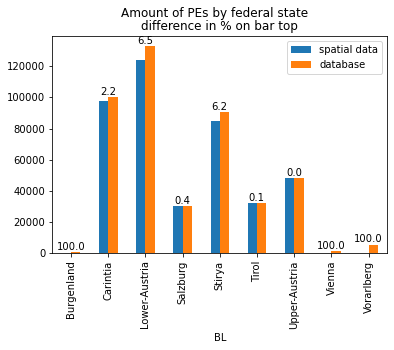

In [32]:
# add % difference!
fig,ax=plt.subplots()
x.sort_values('BL').plot.bar(y=['sum_PE','PE'],ax=ax)

which=[9,10,11,12,13,14,15,16,17]
values=[x for x in x.sort_values('BL')['diff'].round(1).abs()]
#values[5]=4.3

ax.legend(['spatial data','database'])
plt.suptitle('Amount of PEs by federal state')
ax.set_title('difference in % on bar top')


#which=range(len(ax.patches))
#which=[6,7,8,9,10,11]
#which=[0,1,2,3,4,5]
n=0
for index, rect in enumerate(ax.patches):
    if index in which:
        
        height = rect.get_height()
        ax.text(rect.get_x()-0.13 + rect.get_width() / 2, height+150 , values[n],
                ha='center', va='bottom', fontsize='medium', fontstretch='condensed')
        n=n+1
plt.savefig('graphs/spatial_precision.png', bbox_inches='tight')


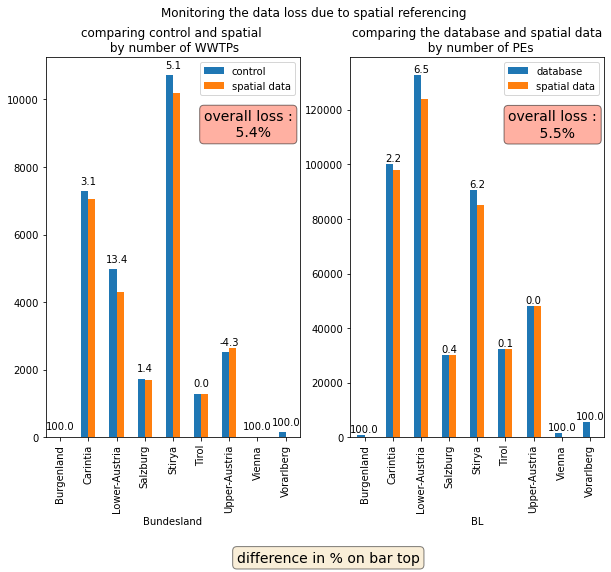

In [41]:
# add % difference!
fig,ax=plt.subplots(1,2, figsize=(10,7))

#spatial with control
control_df.sort_index().plot.bar(y=['control_freq_all','freq_all'],ax=ax[0])
which=[9,10,11,12,13,14,15,16,17]
values=[x for x in control_df.sort_index()      ['div'].round(1)]
#values[5]=4.3
ax[0].legend(['control','spatial data'])
plt.suptitle('Monitoring the data loss due to spatial referencing ')
ax[0].set_title('comparing control and spatial \n by number of WWTPs')
which=[0,1,2,3,4,5,6,7,8]
n=0
for index, rect in enumerate(ax[0].patches):
    if index in which:
        
        height = rect.get_height()
        ax[0].text(rect.get_x()+0.13 + rect.get_width() / 2, height+150 , values[n],
                ha='center', va='bottom', fontsize='medium', fontstretch='condensed')
        n=n+1


#second ax
x.plot.bar(y=['PE','sum_PE'],ax=ax[1])
which=[0,1,2,3,4,5,6,7,8]

values=[x for x in x['diff'].round(1).abs()]
ax[1].legend(['database','spatial data'])
ax[1].set_title('comparing the database and spatial data\n  by number of PEs')

n=0
for index, rect in enumerate(ax[1].patches):
    if index in which:
        
        height = rect.get_height()
        ax[1].text(rect.get_x()+0.13 + rect.get_width() / 2, height+250 , values[n],
                ha='center', va='bottom', fontsize='medium', fontstretch='condensed')
        n=n+1

overall_freq=(control_df.control_freq_all.sum()-control_df.freq_all.sum())/control_df.control_freq_all.sum()*100
#add text
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig.text(0.39, -0.1, 'difference in % on bar top', fontsize=14,
        verticalalignment='top',bbox=props)
props = dict(boxstyle='round', facecolor='tomato', alpha=0.5)
ax[0].text(5.1, 9700, 'overall loss :\n       {}%'.format(overall_freq.round(1)), fontsize=14,
        verticalalignment='top',bbox=props)

overall_PE=(x.PE.sum()-x.sum_PE.sum())/x.PE.sum()*100
#add text2
ax[1].text(5.1, 120000, 'overall loss :\n       {}%'.format(overall_PE.round(1)), fontsize=14,
        verticalalignment='top',bbox=props)
plt.savefig('graphs/spatial_precision.png', bbox_inches='tight')

# result : 
    > very good. minimal difference
    > we can say : because control and datbase are same, overall data loss with spatial is 5.5%